In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df1 = pd.read_csv(r"C:\Users\raval\Downloads\archive (1)\bengaluru_house_prices.csv")
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
df.info

<bound method DataFrame.info of       total_sqft   price
0           1056   39.07
1           2600  120.00
2           1440   62.00
3           1521   95.00
4           1200   51.00
...          ...     ...
13315       3453  231.00
13316       3600  400.00
13317       1141   60.00
13318       4689  488.00
13319        550   17.00

[13320 rows x 2 columns]>

In [10]:
df= df1[["total_sqft","price"]]
df

,total_sqft,price
0,1056,39.07
1,2600,120.00
2,1440,62.00
3,1521,95.00
4,1200,51.00
...,...,...
13315,3453,231.00
13316,3600,400.00
13317,1141,60.00
13318,4689,488.00


In [12]:
# df.rename(columns={"total_sqft":"X","price":"Y"},inplace=True)

In [11]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

df[~df['total_sqft'].apply(is_float)]

,total_sqft,price
30,2100 - 2850,186.000
56,3010 - 3410,192.000
81,2957 - 3450,224.500
122,3067 - 8156,477.000
137,1042 - 1105,54.005
...,...,...
12990,1804 - 2273,122.000
13059,1200 - 1470,72.760
13240,1020 - 1130,52.570
13265,1133 - 1384,59.135


In [13]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None 

In [14]:
df4 = df.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4

,total_sqft,price
0,1056.0,39.07
1,2600.0,120.00
2,1440.0,62.00
3,1521.0,95.00
4,1200.0,51.00
...,...,...
13315,3453.0,231.00
13316,3600.0,400.00
13317,1141.0,60.00
13318,4689.0,488.00


In [9]:
df4.iloc[30]

total_sqft    2475.0
price          186.0
Name: 30, dtype: float64

In [10]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,total_sqft,price,price_per_sqft
0,1056.0,39.07,3699.810606
1,2600.0,120.00,4615.384615
2,1440.0,62.00,4305.555556
3,1521.0,95.00,6245.890861
4,1200.0,51.00,4250.000000


In [39]:
df6 = df5.copy()
df6["price"] = df5['price_per_sqft']*df5['total_sqft']
df6.head()

,total_sqft,price,price_per_sqft
0,1056.0,3907000.0,3699.810606
1,2600.0,12000000.0,4615.384615
2,1440.0,6200000.0,4305.555556
3,1521.0,9500000.0,6245.890861
4,1200.0,5100000.0,4250.000000


In [40]:
df6.drop("price_per_sqft",axis=1,inplace=True)

In [41]:
df6

,total_sqft,price
0,1056.0,3907000.0
1,2600.0,12000000.0
2,1440.0,6200000.0
3,1521.0,9500000.0
4,1200.0,5100000.0
...,...,...
13315,3453.0,23100000.0
13316,3600.0,40000000.0
13317,1141.0,6000000.0
13318,4689.0,48800000.0


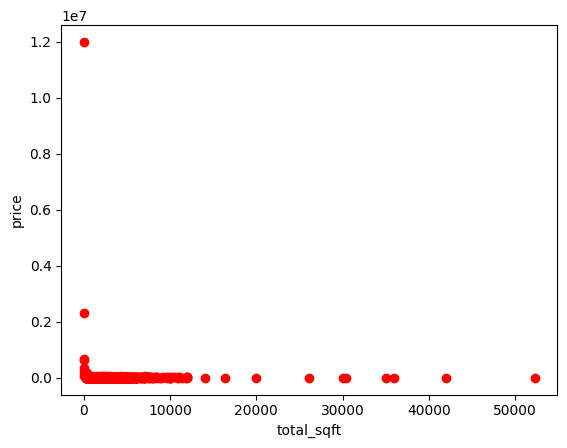

In [36]:
plt.xlabel('total_sqft')
plt.ylabel('price')
plt.scatter(df5.total_sqft,df5.price_per_sqft,color="red")
plt.show()

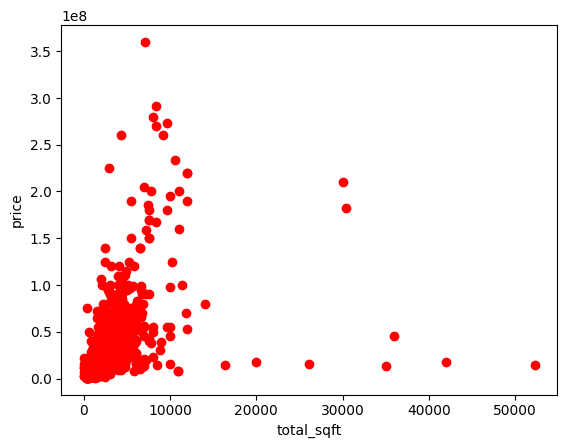

In [42]:
plt.xlabel('total_sqft')
plt.ylabel('price')
plt.scatter(df6.total_sqft,df6.price,color="red")
plt.show()

In [44]:
def gredient_descent(X,Y):
    theta_1=0
    theta_0=0

    l =0.0001 #learning rate
    epochs = 100 #number of iterations

    n = float(len(X))

    # printing gradient descent
    for i in range(epochs):
        Y_pred = theta_1*X + theta_0 
        D_theta_1 = (-2/n)*sum(X*(Y-Y_pred))
        D_theta_0 = (-2/n)*sum(Y-Y_pred)
        theta_1 = theta_1 - l * D_theta_1
        theta_0 = theta_0 - l * D_theta_0
        print(theta_1,theta_0)

In [45]:
gredient_descent(df6.total_sqft,df6.price)

5632628.509545729 2249.0730827180955
-4456499732.510897 -1752461.8597256895
3530416273449.946 1388345326.5536697
-2796773230426672.5 -1099838222232.853
2.2155859004582766e+18 871284819146559.4
-1.7551730075548818e+21 -6.902262720401796e+17
1.390436852758533e+24 5.467928467768042e+20
-1.1014951991554956e+27 -4.3316580286428194e+23
8.725974655774744e+29 3.431511839942588e+26
-6.912661421638443e+32 -2.718421775173195e+29
5.476166252509813e+35 2.1535163777430423e+32
-4.338183949130605e+38 -1.7060019278693702e+35
3.4366816324961065e+41 1.3514838373062336e+38
-2.722517251833705e+44 -1.0706368689636887e+41
2.1567607882107906e+47 8.481516933780644e+43
-1.708572129131841e+50 -6.719003574725946e+46
1.353519934339969e+53 5.322751742365289e+49
-1.0722498520367265e+56 -4.2166499534877386e+52
8.494294882723128e+58 3.3404031769377764e+55
-6.729126184312524e+61 -2.646246073916249e+58
5.330770809063736e+64 2.0963392479276478e+61
-4.2230026069379594e+67 -1.6607065706094284e+64
3.345435708450111e+70 1.31

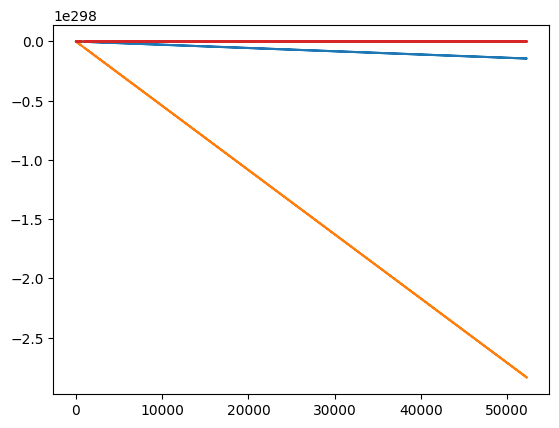

In [52]:
plt.plot(df6.total_sqft,(-2.7524538912703384e+292*df6.total_sqft -1.0824095289504107e+289))
plt.plot(df6.total_sqft,(-5.42582476016781e+293*df6.total_sqft -2.1337194571897248e+290))
plt.plot(df6.total_sqft,(645.20442658*df6.total_sqft +-724646.62125186))
plt.plot(df6.total_sqft,(6928.16983873*df6.total_sqft +440006.79313927))
plt.show()

In [47]:
reg = linear_model.LinearRegression()
reg.fit(df6[['total_sqft']],df6[['price']])

LinearRegression()

In [48]:
# y = bo + b1x
# predict y =
print(reg.coef_)    # b1
print(reg.intercept_)  #bo

[[6928.16983873]]
[440006.79313927]


In [56]:
def gredient_descent1(X,Y):
    theta_1=0
    theta_0=0

    l =0.0001 #learning rate
    epochs = 50 #number of iterations

    n = float(len(X))

    # printing gradient descent
    for i in range(epochs):
        Y_pred = theta_1*X + theta_0 
        
        # Calculate the Mean Squared Error (MSE)
        mse = (1/n) * sum((Y - Y_pred)**2)
        
        D_theta_1 = (-2/n)*sum(X*(Y-Y_pred))
        D_theta_0 = (-2/n)*sum(Y-Y_pred)
        theta_1 = theta_1 - l * D_theta_1
        theta_0 = theta_0 - l * D_theta_0
        print(theta_1,theta_0,mse)

In [57]:
gredient_descent1(df6.total_sqft,df6.price)

5632628.509545729 2249.0730827180955 348661247234380.75
-4456499732.510897 -1752461.8597256895 1.2550940559893817e+20
3530416273449.946 1388345326.5536697 7.876593553061066e+25
-2796773230426672.5 -1099838222232.853 4.9431195369543e+31
2.2155859004582766e+18 871284819146559.4 3.1021571180563572e+37
-1.7551730075548818e+21 -6.902262720401796e+17 1.946822995714337e+43
1.390436852758533e+24 5.467928467768042e+20 1.2217691214224832e+49
-1.1014951991554956e+27 -4.3316580286428194e+23 7.667465349174072e+54
8.725974655774744e+29 3.431511839942588e+26 4.8118767981579314e+60
-6.912661421638443e+32 -2.718421775173195e+29 3.0197930171466924e+66
5.476166252509813e+35 2.1535163777430423e+32 1.895133697084371e+72
-4.338183949130605e+38 -1.7060019278693702e+35 1.1893304307387876e+78
3.4366816324961065e+41 1.3514838373062336e+38 7.463889622443639e+83
-2.722517251833705e+44 -1.0706368689636887e+41 4.6841186314742416e+89
2.1567607882107906e+47 8.481516933780644e+43 2.939615731688825e+95
-1.7085721291318

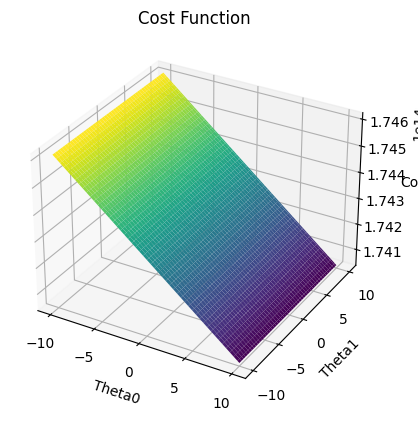

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample data
X = df6.total_sqft
Y = df6.price

# Set up a grid of theta0 and theta1 values
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-10, 10, 100)
theta0_mesh, theta1_mesh = np.meshgrid(theta0_vals, theta1_vals)

# Calculate the cost function for each pair of theta0 and theta1
cost_vals = np.zeros_like(theta0_mesh)
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        theta0 = theta0_vals[i]
        theta1 = theta1_vals[j]
        Y_pred = theta1 * X + theta0
        cost_vals[i, j] = np.sum((Y_pred - Y) ** 2) / (2 * len(X))

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_mesh, theta1_mesh, cost_vals, cmap='viridis')

# Set labels and title
ax.set_xlabel('Theta0')
ax.set_ylabel('Theta1')
ax.set_zlabel('Cost')
ax.set_title('Cost Function')

plt.show()


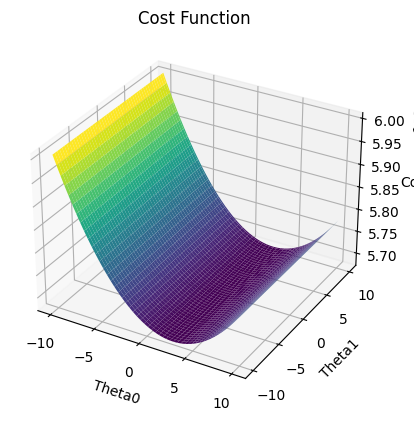

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample data
X = df5.total_sqft
Y = df5.price_per_sqft

# Set up a grid of theta0 and theta1 values
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-10, 10, 100)
theta0_mesh, theta1_mesh = np.meshgrid(theta0_vals, theta1_vals)

# Calculate the cost function for each pair of theta0 and theta1
cost_vals = np.zeros_like(theta0_mesh)
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        theta0 = theta0_vals[i]
        theta1 = theta1_vals[j]
        Y_pred = theta1 * X + theta0
        cost_vals[i, j] = np.sum((Y_pred - Y) ** 2) / (2 * len(X))

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_mesh, theta1_mesh, cost_vals, cmap='viridis')

# Set labels and title
ax.set_xlabel('Theta0')
ax.set_ylabel('Theta1')
ax.set_zlabel('Cost')
ax.set_title('Cost Function')

plt.show()


In [60]:
df6.head()

,total_sqft,price
0,1056.0,3907000.0
1,2600.0,12000000.0
2,1440.0,6200000.0
3,1521.0,9500000.0
4,1200.0,5100000.0


In [62]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Separate features and target
X = df6[['total_sqft']]
Y = df6['price']

# Standardization
scaler = StandardScaler()
X_scaled_standard = scaler.fit_transform(X)

# Normalization
normalizer = MinMaxScaler()
X_scaled_normalized = normalizer.fit_transform(X)

# Print the scaled data
print("Standardized Data:")
print(X_scaled_standard)

print("\nNormalized Data:")
print(X_scaled_normalized)

Standardized Data:
[[-0.40668889]
 [ 0.8401228 ]
 [-0.09660101]
 ...
 [-0.33804965]
 [ 2.52703319]
 [-0.81529428]]

Normalized Data:
[[0.02018328]
 [0.04972164]
 [0.02752961]
 ...
 [0.02180942]
 [0.08968644]
 [0.01050296]]


In [66]:
# Standardization
scaler = StandardScaler()
X_scaled_standard = scaler.fit_transform(X)

# Normalization
normalizer = MinMaxScaler()
X_scaled_normalized = normalizer.fit_transform(X)

# Print the scaled data
print("Standardized Data:")
print(X_scaled_standard)

print("\nNormalized Data:")
print(X_scaled_normalized)

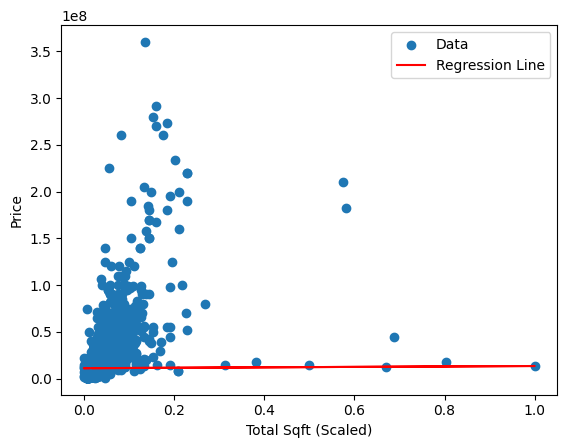

In [67]:
# Assuming you have already scaled your features (X_scaled) and target (Y)
# Initialize coefficients
theta_0 = 0
theta_1 = 0

# Define hyperparameters
learning_rate = 0.01
epochs = 1000

# Gradient Descent iterations
for _ in range(epochs):
    Y_pred = theta_1 * X_scaled_normalized + theta_0
    D_theta_1 = (-1 / len(X_scaled_normalized)) * sum(X_scaled_normalized * (Y - Y_pred))
    D_theta_0 = (-1 / len(X_scaled_normalized)) * sum(Y - Y_pred)
    theta_1 = theta_1 - learning_rate * D_theta_1
    theta_0 = theta_0 - learning_rate * D_theta_0

# Visualization
import matplotlib.pyplot as plt
plt.scatter(X_scaled_normalized, Y, label='Data')
plt.plot(X_scaled_normalized, Y_pred, color='red', label='Regression Line')
plt.xlabel('Total Sqft (Scaled)')
plt.ylabel('Price')
plt.legend()
plt.show()

# Evaluation
# Split data into train and test sets
# Train your model using the training set and evaluate its performance on the test set
# Calculate metrics like MAE or RMSE to assess model performance


In [68]:
X_scaled_standard = X_scaled_standard.reshape(-1)

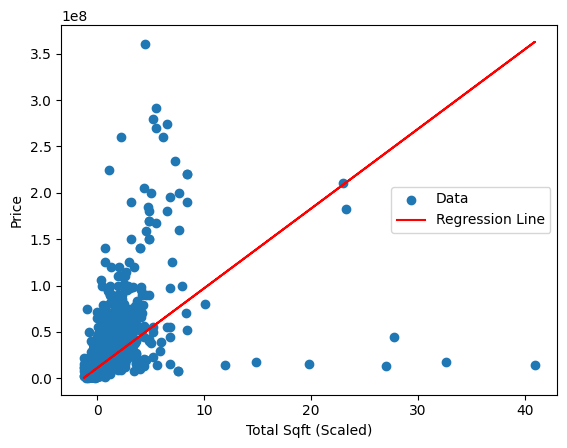

In [69]:
# Assuming you have already scaled your features (X_scaled) and target (Y)
# Initialize coefficients
theta_0 = 0
theta_1 = 0

# Define hyperparameters
learning_rate = 0.01
epochs = 1000

# Gradient Descent iterations
for _ in range(epochs):
    Y_pred = theta_1 * X_scaled_standard + theta_0
    D_theta_1 = (-1 / len(X_scaled_standard)) * sum(X_scaled_standard * (Y - Y_pred))
    D_theta_0 = (-1 / len(X_scaled_standard)) * sum(Y - Y_pred)
    theta_1 = theta_1 - learning_rate * D_theta_1
    theta_0 = theta_0 - learning_rate * D_theta_0

# Visualization
import matplotlib.pyplot as plt
plt.scatter(X_scaled_standard, Y, label='Data')
plt.plot(X_scaled_standard, Y_pred, color='red', label='Regression Line')
plt.xlabel('Total Sqft (Scaled)')
plt.ylabel('Price')
plt.legend()
plt.show()

# Evaluation
# Split data into train and test sets
# Train your model using the training set and evaluate its performance on the test set
# Calculate metrics like MAE or RMSE to assess model performance


In [28]:
X=np.array(df["X"].astype(int).values)
Y=np.array(df["Y"].astype(int).values)

ValueError: invalid literal for int() with base 10: '2100 - 2850'

In [29]:
a= df["X"].astype(int).values

ValueError: invalid literal for int() with base 10: '2100 - 2850'

In [23]:
X

array(['1056', '2600', '1440', ..., '1141', '4689', '550'], dtype=object)

In [27]:
df.isnull().count()

X    13320
Y    13320
dtype: int64

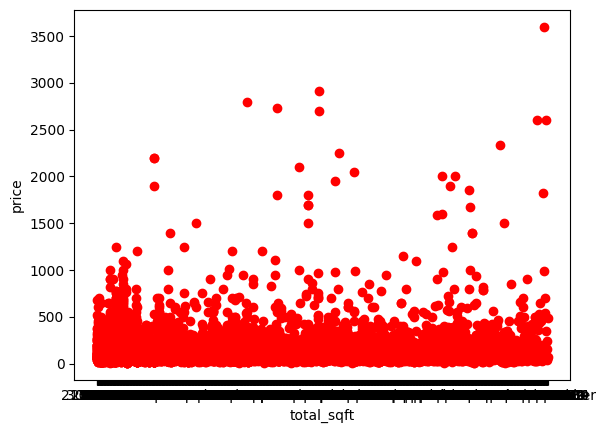

In [13]:
plt.xlabel('total_sqft')
plt.ylabel('price')
plt.scatter(df.total_sqft,df.price,color="red")
plt.show()

In [21]:
def gredient_descent(X,Y):
    theta_1=0
    theta_0=0

    l =0.001 #learning rate
    epochs = 1000 #number of iterations

    n = float(len(X))

    # printing gradient descent
    for i in range(epochs):
        Y_pred = theta_1*X + theta_0 
        D_theta_1 = (-2/n)*sum(X*(Y-Y_pred))
        D_theta_0 = (-2/n)*sum(Y-Y_pred)
        theta_1 = theta_1 - l * D_theta_1
        theta_0 = theta_0 - l * D_theta_0
        print(theta_1,theta_0)
    

In [22]:
gredient_descent(X,Y)

TypeError: can only concatenate str (not "int") to str

In [ ]:
df.

In [30]:
# plt.xlabel('x')
# plt.ylabel('y')
# plt.scatter(df.x,df.y,color="red")
# plt.show()

reg = linear_model.LinearRegression()
reg.fit(df[['X']],df[['Y']])
print(reg.predict([[3432]]))

ValueError: could not convert string to float: '2100 - 2850'